In [15]:
import cirq
import math
from cirq.contrib.svg import SVGCircuit
import sympy
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
## DEFINITION
N = 4
D=2
A = 0.03
##sigma=np.zeros((N,N))
sigma = np.array([[99.8,42.5, 37.2,40.3,38.0,30.0,46.8,14.9],
                  [42.5, 100.5, 41.1, 15.2, 71.1, 27.8, 47.5, 12.7],
                  [37.2, 41.1, 181.3, 17.9, 38.4, 27.9, 39.0, 8.3],
                  [40.3, 15.2, 17.9, 253.1, 12.4, 48.7, 33.3, 3.8],
                  [38.0, 71.1, 38.4, 12.4,84.7, 28.5, 42.0, 13.1],
                  [30.0, 27.8, 27.9, 48.7, 28.5, 173.1, 28.9, -12.7],
                  [46.8, 47.5, 39.0, 33.3, 42.0, 28.9, 125.8, 14.6],
                  [14.9, 12.7, 8.3, 3.8, 13.1, -12.7, 14.6, 179.0]])

sigma = sigma/10**6
y = np.zeros(N)
qubits = [cirq.LineQubit(i) for i in range(2*N)]
L=len(qubits)
index_grid_pair = [(2*i,2*i+1) for i in range(0,N) ]
mu = np.array([0.000401, 0.000061, 0.000916,-0.000619,0.000212, 0.001477, 0.001047,-0.000881])
lam=0.9
gamma=1
beta=1

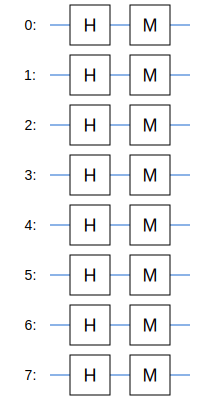

In [17]:
## INITIALIZATION
def circuit_hadamard(L):
    hadamard=cirq.Circuit()
    measurements=cirq.Circuit()
    for i in range(L):
        hadamard.append(cirq.H(qubits[i]))
        measurements.append(cirq.measure(qubits[i]))

    circuit = cirq.Circuit((hadamard,measurements))

#print(circuit)
    SVGCircuit(circuit)

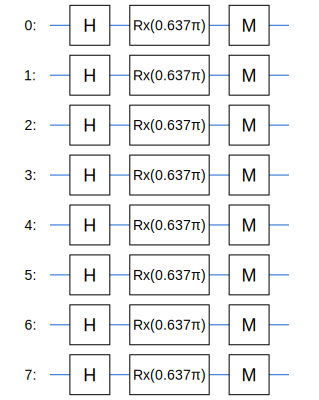

In [18]:
## MIXER OPERATOR

mixer=cirq.Circuit()
for i in range(L):
    mixer.append(cirq.rx(2*beta).on(qubits[i]))
circuit = cirq.Circuit((hadamard,mixer,measurements))
SVGCircuit(circuit)


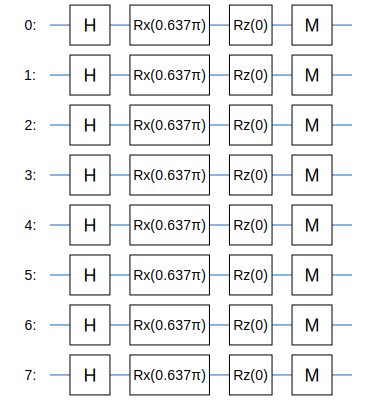

In [19]:
## RETURNS OPERATOR
returns=cirq.Circuit()
for i in range(L):
    returns.append(cirq.rz((-1)**int(i)*(1-lam)*gamma*mu[int(i/2)]).on(qubits[i]))

circuit = cirq.Circuit((hadamard,mixer,returns,measurements))

SVGCircuit(circuit)

In [20]:
combinations=[]
for i in range(L):
    for j in range(L):
        if i!=j:
            combinations.append((i,j))
numcombinations=len(combinations)

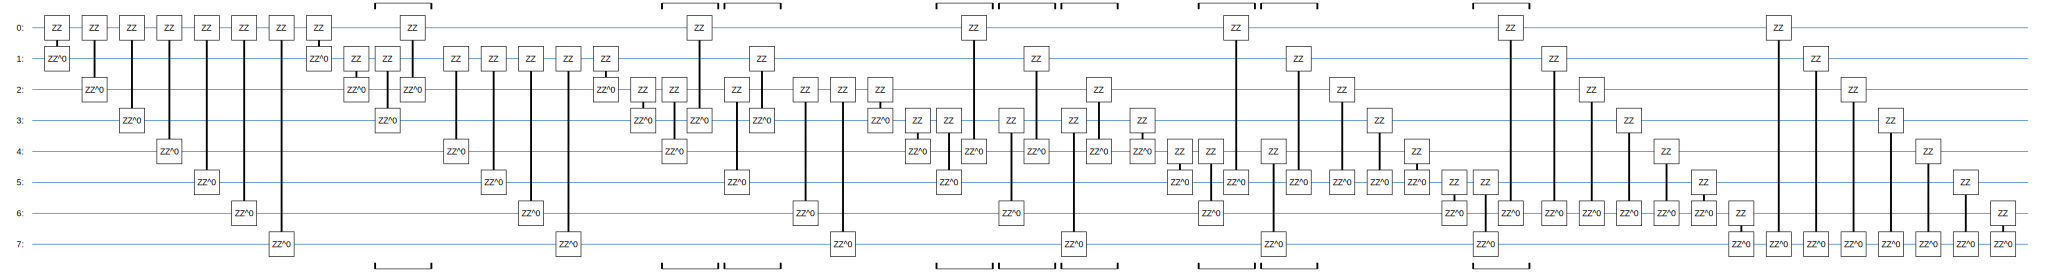

In [21]:
## RISK OPERATOR
risk=cirq.Circuit()
for i in range(numcombinations):
    q1=combinations[i][0]
    q2=combinations[i][1]
    ii=math.floor(q1/2)
    jj=math.floor(q2/2)
    sign=-(-1)**((q1 % 2)+(q2 %2))
    risk.append(cirq.ZZPowGate(exponent= 1/2*sign*gamma*lam*sigma[ii][jj]).on(qubits[q1],qubits[q2]))
SVGCircuit(risk)

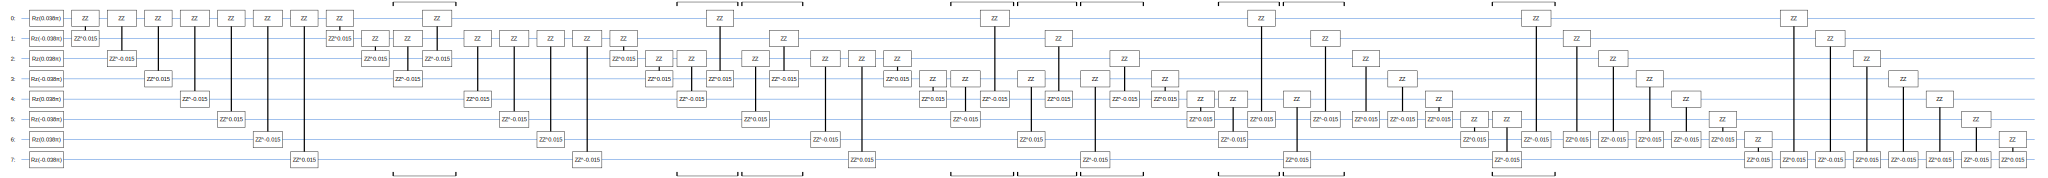

In [22]:
##  Constraint
constraint=cirq.Circuit()
for i in range(len(qubits)):
    sign=(-1)**i
    constraint.append(cirq.rz( sign *2 *gamma*A*D).on(qubits[i]))
for i in range(numcombinations):
    q1=combinations[i][0]
    q2=combinations[i][1]
    sign=-(-1)**((q1 % 2)+(q2 %2))
    constraint.append(cirq.ZZPowGate(exponent= 1/2*sign*A*gamma).on(qubits[q1],qubits[q2]))

circuit = cirq.Circuit((constraint))
SVGCircuit(circuit)


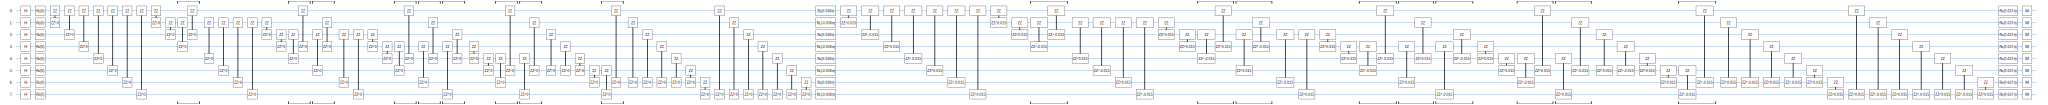

In [23]:
circuit=cirq.Circuit(hadamard, returns, risk, constraint, mixer, measurements)
SVGCircuit(circuit)

In [24]:
simulator = cirq.Simulator()
result = simulator.run(circuit)

print(result)

q(0)=1
q(1)=1
q(2)=0
q(3)=1
q(4)=1
q(5)=1
q(6)=1
q(7)=0


In [35]:
result = simulator.run(circuit)

print(result)

q(0)=0
q(1)=1
q(2)=0
q(3)=1
q(4)=0
q(5)=1
q(6)=0
q(7)=0
